In [99]:
# Import necessary libraries
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, average_precision_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

DATAPATH = "../data"
FIGUREPATH = "../figures"

In [100]:
# Step 2: Load the datasets
# Construct file paths
dataset_filepath = os.path.join(DATAPATH, 'Total_dataset.csv')
descriptors_filepath = os.path.join(DATAPATH, 'computed_descriptors.csv')
physicochemical_filepath = os.path.join(DATAPATH, 'physicochemical_properties.csv')


# Load dataset
dataset = pd.read_csv(dataset_filepath)
descriptors =pd.read_csv(descriptors_filepath)
physicochemical_properties=pd.read_csv(physicochemical_filepath)

In [101]:
dataset.head()

,smiles,toxicity,ref
0,CC1=NN=C(O1)C(=O)NC(C)(C)C2=N/C(=C(/NCC3=CC=C(...,1,DILIrank
1,C1=CC2=C(C=C1OC(F)(F)F)SC(=N2)N,1,DILIrank
2,CCC1C(=O)N(CC(=O)N(C(C(=O)NC(C(=O)N(C(C(=O)NC(...,1,DILIrank
3,CC(C1=CC(=CC=C1)OC2=CC=CC=C2)C(=O)O,1,DILIrank
4,CC(=O)NC1=NN=C(S1)S(=O)(=O)N,1,DILIrank


In [102]:
descriptors.head()

,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,toxicity
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [103]:
physicochemical_properties.head()

,MW,ALOGP,HBA,HBD,PSA,ROTB,AROM,ALERTS,toxicity
0,444.423,0.98202,8,3,150.02,6,2,3,1
1,234.202,2.77710,3,1,48.14,1,2,0,1
2,1202.635,3.26900,12,5,278.80,15,0,1,1
3,242.274,3.66700,3,1,46.53,4,2,0,1
4,222.251,-0.85610,5,2,115.04,2,1,1,1


In [41]:
# TRAIN TEST SPLITS FOR computed_descriptors
# we will always use the same train test split, saving the files to reuse them
# ONLY RUN ONCE
from sklearn.model_selection import train_test_split

# Read the descriptors file
descriptors = pd.read_csv(descriptors_filepath)

# Create a folder for train test splits if it doesn't exist
train_test_splits_folder = os.path.join(DATAPATH, "train_test_splits")
os.makedirs(train_test_splits_folder, exist_ok=True)

# Create 5 different train-test splits and save them
for i in range(5):
    # Split the data into train and test sets
    train, test = train_test_split(descriptors, test_size=0.2, random_state=i)
    
    # Save train and test sets as CSV files
    train.to_csv(os.path.join(train_test_splits_folder, f"train_descriptors{i}.csv"), index=False)
    test.to_csv(os.path.join(train_test_splits_folder, f"test_descriptors{i}.csv"), index=False)


In [42]:
# TRAIN TEST SPLITS FOR physicochemical_properties
# we will always use the same train test split, saving the files to reuse them
# ONLY RUN ONCE
from sklearn.model_selection import train_test_split

# Read the descriptors file
descriptors = pd.read_csv(physicochemical_filepath)

# Create a folder for train test splits if it doesn't exist
train_test_splits_folder = os.path.join(DATAPATH, "train_test_splits")
os.makedirs(train_test_splits_folder, exist_ok=True)

# Create 5 different train-test splits and save them
for i in range(5):
    # Split the data into train and test sets
    train, test = train_test_split(descriptors, test_size=0.2, random_state=i)
    
    # Save train and test sets as CSV files
    train.to_csv(os.path.join(train_test_splits_folder, f"train_physicochemical_properties{i}.csv"), index=False)
    test.to_csv(os.path.join(train_test_splits_folder, f"test_physicochemical_properties{i}.csv"), index=False)



Classification Report for Fold 1:

              precision    recall  f1-score   support

           0       0.75      0.79      0.77       167
           1       0.82      0.78      0.80       203

    accuracy                           0.78       370
   macro avg       0.78      0.78      0.78       370
weighted avg       0.79      0.78      0.78       370

AUC for Fold 1: 0.87


Classification Report for Fold 2:

              precision    recall  f1-score   support

           0       0.77      0.76      0.76       174
           1       0.79      0.80      0.79       196

    accuracy                           0.78       370
   macro avg       0.78      0.78      0.78       370
weighted avg       0.78      0.78      0.78       370

AUC for Fold 2: 0.86


Classification Report for Fold 3:

              precision    recall  f1-score   support

           0       0.75      0.76      0.76       179
           1       0.77      0.76      0.77       191

    accuracy                  

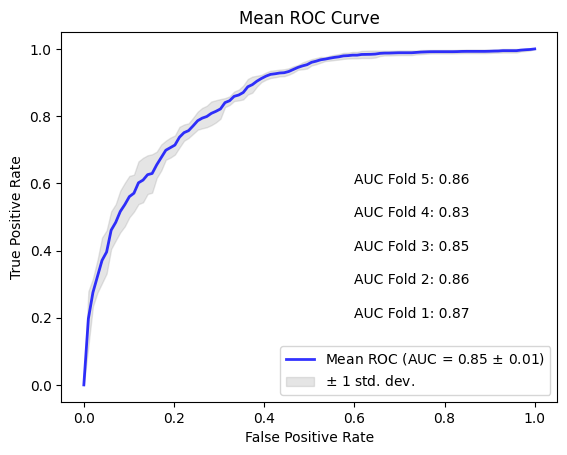

['../../checkpoints/random_forest_model.pkl']

<Figure size 640x480 with 0 Axes>

In [104]:
## Random forest classifier model with molecular descriptors
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_curve, auc
import joblib

# Initialize lists to store true labels and predictions across all folds
all_true_labels = []
all_predictions = []

# Initialize lists to store fpr, tpr, and auc across all folds
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

# Loop over each split
for i in range(5):
    # Load train and test sets
    train_filepath = os.path.join(DATAPATH, f"train_test_splits/train_descriptors{i}.csv")
    test_filepath = os.path.join(DATAPATH, f"train_test_splits/test_descriptors{i}.csv")
    
    train = pd.read_csv(train_filepath)
    test = pd.read_csv(test_filepath)
    
    # Separate features and target variable for train and test sets
    X_train, y_train = train.drop(columns=['toxicity']), train['toxicity']
    X_test, y_test = test.drop(columns=['toxicity']), test['toxicity']
    
    # Initialize and train Random Forest classifier
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train, y_train)
    
    # Predict labels on test set
    y_pred = clf.predict(X_test)
    
    # Append true labels and predictions to lists
    all_true_labels.extend(y_test)
    all_predictions.extend(y_pred)
    
    # Calculate ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    
    # Print classification report for the current fold
    print(f"\nClassification Report for Fold {i+1}:\n")
    print(classification_report(y_test, y_pred))
    print(f"AUC for Fold {i+1}: {roc_auc:.2f}\n")

# Calculate and print the average classification report
print("\nAverage Classification Report Across All Folds:\n")
print(classification_report(all_true_labels, all_predictions))

# Calculate mean ROC curve and AUC
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)

# Plot mean ROC curve with boundaries
plt.plot(mean_fpr, mean_tpr, color='b', label=f'Mean ROC (AUC = {mean_auc:.2f} $\pm$ {std_auc:.2f})', lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)

plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2, label=r'$\pm$ 1 std. dev.')

# Show AUC value for each fold on the plot
for i, auc_value in enumerate(aucs):
    plt.text(0.6, 0.2+i*0.1, f'AUC Fold {i+1}: {auc_value:.2f}', fontsize=10)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Mean ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Save the trained model
joblib.dump(clf, '../../checkpoints/random_forest_model.pkl')


[LightGBM] [Info] Number of positive: 749, number of negative: 731
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007161 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2040
[LightGBM] [Info] Number of data points in the train set: 1480, number of used features: 1020
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.506081 -> initscore=0.024326
[LightGBM] [Info] Start training from score 0.024326

Classification Report for Fold 0:

              precision    recall  f1-score   support

           0       0.73      0.76      0.74       167
           1       0.80      0.77      0.78       203

    accuracy                           0.76       370
   macro avg       0.76      0.76      0.76       370
weighted avg       0.77      0.76      0.77       370

[LightGBM] [Info] Number of positive: 756, number of negative: 724
[LightGBM] [Info]

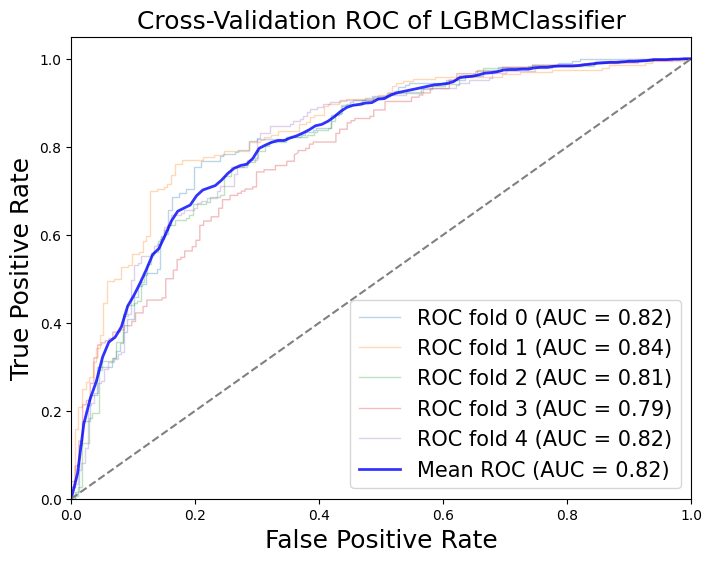

<Figure size 640x480 with 0 Axes>

In [105]:
## LightGBM model with molecular descriptors
from lightgbm import LGBMClassifier

# Initialize LightGBM model
lgb_model = LGBMClassifier(random_state=42)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
plt.figure(figsize=(8, 6))
i = 0

all_true_labels = []
all_predictions = []

# Loop over each split
for i in range(5):
    # Load train and test sets
    train_filepath = os.path.join(DATAPATH, f"train_test_splits/train_descriptors{i}.csv")
    test_filepath = os.path.join(DATAPATH, f"train_test_splits/test_descriptors{i}.csv")
    
    train = pd.read_csv(train_filepath)
    test = pd.read_csv(test_filepath)
    
    X_train, y_train = train.drop(columns=['toxicity']), train['toxicity']
    X_test, y_test = test.drop(columns=['toxicity']), test['toxicity']

    # Train LightGBM model
    lgb_model.fit(X_train, y_train)

    # Predict probabilities
    y_pred_proba = lgb_model.predict_proba(X_test)[:, 1]

    # Compute ROC curve and area under the curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0

    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    # Classification report
    y_pred = (y_pred_proba > 0.5).astype(int)
    print(f"\nClassification Report for Fold {i}:\n")
    print(classification_report(y_test, y_pred))

    # Accumulate true labels and predictions
    all_true_labels.extend(y_test)
    all_predictions.extend(y_pred)

    i += 1

# Calculate and print the average classification report
print("\nAverage Classification Report Across All Folds:\n")
print(classification_report(all_true_labels, all_predictions))

# Calculate mean ROC curve and AUC
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = np.mean(aucs)

# Plot mean ROC curve with boundaries
plt.plot(mean_fpr, mean_tpr, color='b', label=r'Mean ROC (AUC = %0.2f)' % mean_auc, lw=2, alpha=.8)

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Cross-Validation ROC of LGBMClassifier', fontsize=18)
plt.legend(loc="lower right", prop={'size': 15})
plt.show()



Classification Report for Fold 0:

              precision    recall  f1-score   support

           0       0.71      0.73      0.72       167
           1       0.77      0.75      0.76       203

    accuracy                           0.74       370
   macro avg       0.74      0.74      0.74       370
weighted avg       0.74      0.74      0.74       370


Classification Report for Fold 1:

              precision    recall  f1-score   support

           0       0.74      0.75      0.74       174
           1       0.78      0.76      0.77       196

    accuracy                           0.76       370
   macro avg       0.76      0.76      0.76       370
weighted avg       0.76      0.76      0.76       370


Classification Report for Fold 2:

              precision    recall  f1-score   support

           0       0.67      0.72      0.70       179
           1       0.72      0.67      0.69       191

    accuracy                           0.69       370
   macro avg       0

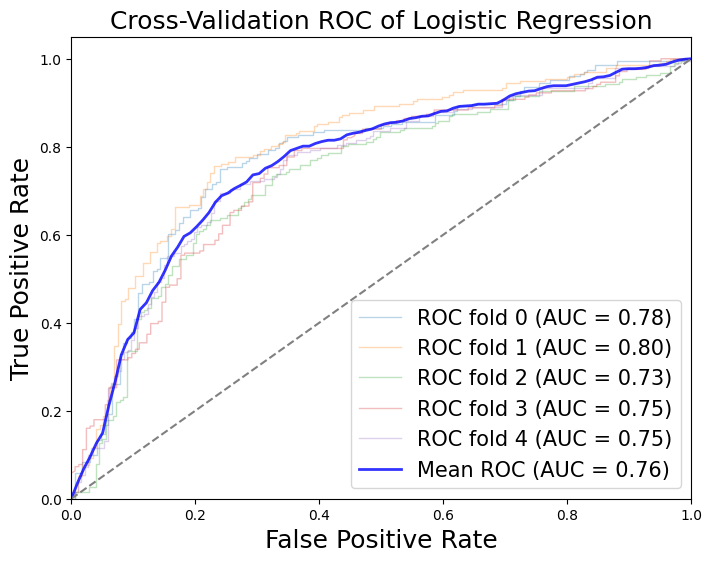

<Figure size 640x480 with 0 Axes>

In [106]:
##Logistic regression with molecular descriptors
from sklearn.linear_model import LogisticRegression


# Initialize Logistic Regression model
lr_model = LogisticRegression(random_state=42)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
plt.figure(figsize=(8, 6))
i = 0

all_true_labels = []
all_predictions = []

# Loop over each split
for i in range(5):
     # Load train and test sets
    train_filepath = os.path.join(DATAPATH, f"train_test_splits/train_descriptors{i}.csv")
    test_filepath = os.path.join(DATAPATH, f"train_test_splits/test_descriptors{i}.csv")
    
    train = pd.read_csv(train_filepath)
    test = pd.read_csv(test_filepath)
    
    X_train, y_train = train.drop(columns=['toxicity']), train['toxicity']
    X_test, y_test = test.drop(columns=['toxicity']), test['toxicity']

    # Train Logistic Regression model
    lr_model.fit(X_train, y_train)

    # Predict probabilities
    y_pred_proba = lr_model.predict_proba(X_test)[:, 1]

    # Compute ROC curve and area under the curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0

    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    # Classification report
    y_pred = (y_pred_proba > 0.5).astype(int)
    print(f"\nClassification Report for Fold {i}:\n")
    print(classification_report(y_test, y_pred))

    # Accumulate true labels and predictions
    all_true_labels.extend(y_test)
    all_predictions.extend(y_pred)

    i += 1

# Calculate and print the average classification report
print("\nAverage Classification Report Across All Folds:\n")
print(classification_report(all_true_labels, all_predictions))

# Calculate mean ROC curve and AUC
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = np.mean(aucs)

# Plot mean ROC curve with boundaries
plt.plot(mean_fpr, mean_tpr, color='b', label=r'Mean ROC (AUC = %0.2f)' % mean_auc, lw=2, alpha=.8)

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Cross-Validation ROC of Logistic Regression', fontsize=18)
plt.legend(loc="lower right", prop={'size': 15})
plt.show()



Classification Report for Fold 0:

              precision    recall  f1-score   support

           0       0.71      0.76      0.74       167
           1       0.79      0.75      0.77       203

    accuracy                           0.75       370
   macro avg       0.75      0.75      0.75       370
weighted avg       0.76      0.75      0.75       370


Classification Report for Fold 1:

              precision    recall  f1-score   support

           0       0.74      0.77      0.75       174
           1       0.79      0.76      0.77       196

    accuracy                           0.76       370
   macro avg       0.76      0.77      0.76       370
weighted avg       0.77      0.76      0.77       370


Classification Report for Fold 2:

              precision    recall  f1-score   support

           0       0.70      0.72      0.71       179
           1       0.73      0.71      0.72       191

    accuracy                           0.71       370
   macro avg       0

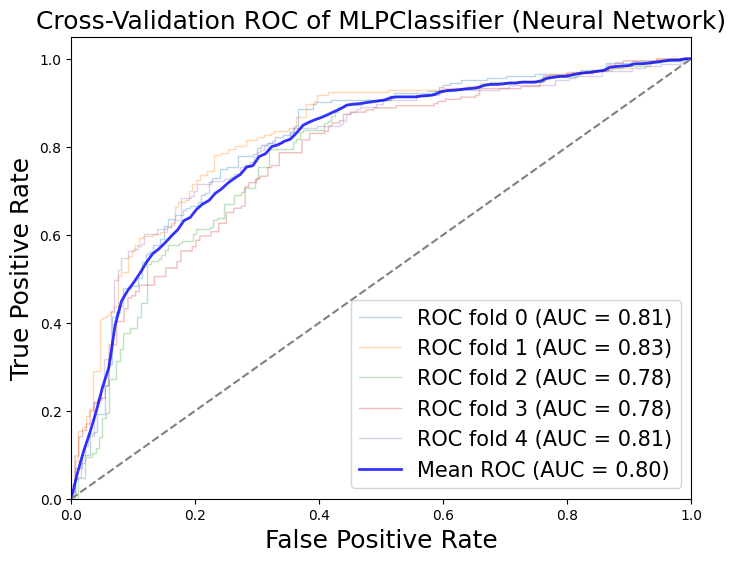

<Figure size 640x480 with 0 Axes>

In [108]:
#Neural network with molecular descriptors
from sklearn.neural_network import MLPClassifier


# Initialize Neural Network model
nn_model = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', random_state=42)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
plt.figure(figsize=(8, 6))
i = 0

all_true_labels = []
all_predictions = []

# Loop over each split
for i in range(5):
     # Load train and test sets
    train_filepath = os.path.join(DATAPATH, f"train_test_splits/train_descriptors{i}.csv")
    test_filepath = os.path.join(DATAPATH, f"train_test_splits/test_descriptors{i}.csv")
    
    train = pd.read_csv(train_filepath)
    test = pd.read_csv(test_filepath)
    
    X_train, y_train = train.drop(columns=['toxicity']), train['toxicity']
    X_test, y_test = test.drop(columns=['toxicity']), test['toxicity']

    # Train Neural Network model
    nn_model.fit(X_train, y_train)

    # Predict probabilities
    y_pred_proba = nn_model.predict_proba(X_test)[:, 1]

    # Compute ROC curve and area under the curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0

    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    # Classification report
    y_pred = (y_pred_proba > 0.5).astype(int)
    print(f"\nClassification Report for Fold {i}:\n")
    print(classification_report(y_test, y_pred))

    # Accumulate true labels and predictions
    all_true_labels.extend(y_test)
    all_predictions.extend(y_pred)

    i += 1

# Calculate and print the average classification report
print("\nAverage Classification Report Across All Folds:\n")
print(classification_report(all_true_labels, all_predictions))

# Calculate mean ROC curve and AUC
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = np.mean(aucs)

# Plot mean ROC curve with boundaries
plt.plot(mean_fpr, mean_tpr, color='b', label=r'Mean ROC (AUC = %0.2f)' % mean_auc, lw=2, alpha=.8)

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Cross-Validation ROC of MLPClassifier (Neural Network)', fontsize=18)
plt.legend(loc="lower right", prop={'size': 15})
plt.show()


In [ ]:
## Now to train the models with physicochemical_properties


Classification Report for Fold 1:

              precision    recall  f1-score   support

           0       0.73      0.76      0.75       167
           1       0.80      0.77      0.79       203

    accuracy                           0.77       370
   macro avg       0.77      0.77      0.77       370
weighted avg       0.77      0.77      0.77       370

AUC for Fold 1: 0.86


Classification Report for Fold 2:

              precision    recall  f1-score   support

           0       0.72      0.77      0.74       174
           1       0.78      0.73      0.76       196

    accuracy                           0.75       370
   macro avg       0.75      0.75      0.75       370
weighted avg       0.75      0.75      0.75       370

AUC for Fold 2: 0.83


Classification Report for Fold 3:

              precision    recall  f1-score   support

           0       0.74      0.75      0.75       179
           1       0.76      0.75      0.76       191

    accuracy                  

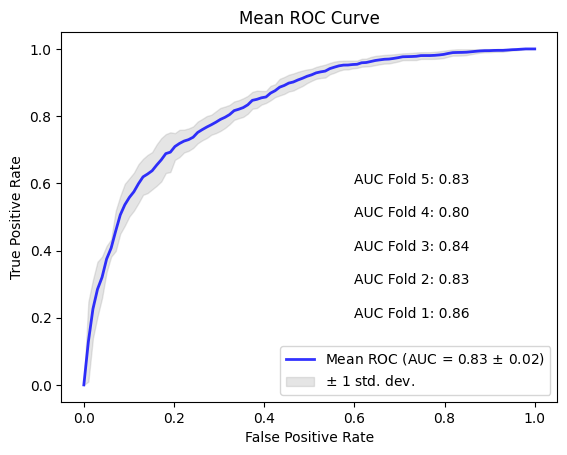

<Figure size 640x480 with 0 Axes>

In [109]:
##Random forest with physicochemical_properties
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_curve, auc

# Initialize lists to store true labels and predictions across all folds
all_true_labels = []
all_predictions = []

# Initialize lists to store fpr, tpr, and auc across all folds
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

# Loop over each split
for i in range(5):
    # Load train and test sets
    train_filepath = os.path.join(DATAPATH, f"train_test_splits/train_physicochemical_properties{i}.csv")
    test_filepath = os.path.join(DATAPATH, f"train_test_splits/test_physicochemical_properties{i}.csv")
    
    train = pd.read_csv(train_filepath)
    test = pd.read_csv(test_filepath)
    
    # Separate features and target variable for train and test sets
    X_train, y_train = train.drop(columns=['toxicity']), train['toxicity']
    X_test, y_test = test.drop(columns=['toxicity']), test['toxicity']
    
    # Initialize and train Random Forest classifier
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train, y_train)
    
    # Predict labels on test set
    y_pred = clf.predict(X_test)
    
    # Append true labels and predictions to lists
    all_true_labels.extend(y_test)
    all_predictions.extend(y_pred)
    
    # Calculate ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    
    # Print classification report for the current fold
    print(f"\nClassification Report for Fold {i+1}:\n")
    print(classification_report(y_test, y_pred))
    print(f"AUC for Fold {i+1}: {roc_auc:.2f}\n")

# Calculate and print the average classification report
print("\nAverage Classification Report Across All Folds:\n")
print(classification_report(all_true_labels, all_predictions))

# Calculate mean ROC curve and AUC
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)

# Plot mean ROC curve with boundaries
plt.plot(mean_fpr, mean_tpr, color='b', label=f'Mean ROC (AUC = {mean_auc:.2f} $\pm$ {std_auc:.2f})', lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)

plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2, label=r'$\pm$ 1 std. dev.')

# Show AUC value for each fold on the plot
for i, auc_value in enumerate(aucs):
    plt.text(0.6, 0.2+i*0.1, f'AUC Fold {i+1}: {auc_value:.2f}', fontsize=10)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Mean ROC Curve')
plt.legend(loc='lower right')
plt.show()




[LightGBM] [Info] Number of positive: 749, number of negative: 731
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000116 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 858
[LightGBM] [Info] Number of data points in the train set: 1480, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.506081 -> initscore=0.024326
[LightGBM] [Info] Start training from score 0.024326

Classification Report for Fold 0:

              precision    recall  f1-score   support

           0       0.67      0.74      0.70       167
           1       0.76      0.70      0.73       203

    accuracy                           0.72       370
   macro avg       0.72      0.72      0.72       370
weighted avg       0.72      0.72      0.72       370

[LightGBM] [Info] Number of positive: 756, number of negative: 724
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was

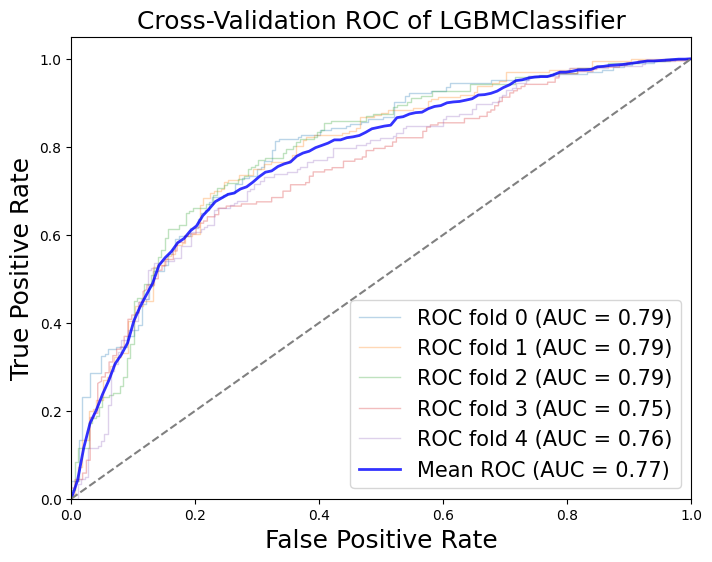

<Figure size 640x480 with 0 Axes>

In [110]:
##Lightgbm with physicochemical_properties
from lightgbm import LGBMClassifier

# Initialize LightGBM model
lgb_model = LGBMClassifier(random_state=42)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
plt.figure(figsize=(8, 6))
i = 0

all_true_labels = []
all_predictions = []

# Loop over each split
for i in range(5):
    # Load train and test sets
    train_filepath = os.path.join(DATAPATH, f"train_test_splits/train_physicochemical_properties{i}.csv")
    test_filepath = os.path.join(DATAPATH, f"train_test_splits/test_physicochemical_properties{i}.csv")
    
    train = pd.read_csv(train_filepath)
    test = pd.read_csv(test_filepath)
    
    X_train, y_train = train.drop(columns=['toxicity']), train['toxicity']
    X_test, y_test = test.drop(columns=['toxicity']), test['toxicity']

    # Train LightGBM model
    lgb_model.fit(X_train, y_train)

    # Predict probabilities
    y_pred_proba = lgb_model.predict_proba(X_test)[:, 1]

    # Compute ROC curve and area under the curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0

    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    # Classification report
    y_pred = (y_pred_proba > 0.5).astype(int)
    print(f"\nClassification Report for Fold {i}:\n")
    print(classification_report(y_test, y_pred))

    # Accumulate true labels and predictions
    all_true_labels.extend(y_test)
    all_predictions.extend(y_pred)

    i += 1

# Calculate and print the average classification report
print("\nAverage Classification Report Across All Folds:\n")
print(classification_report(all_true_labels, all_predictions))

# Calculate mean ROC curve and AUC
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = np.mean(aucs)

# Plot mean ROC curve with boundaries
plt.plot(mean_fpr, mean_tpr, color='b', label=r'Mean ROC (AUC = %0.2f)' % mean_auc, lw=2, alpha=.8)

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Cross-Validation ROC of LGBMClassifier', fontsize=18)
plt.legend(loc="lower right", prop={'size': 15})
plt.show()

/home/leila/miniconda3/envs/chemprop/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/leila/miniconda3/envs/chemprop/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin


Classification Report for Fold 0:

              precision    recall  f1-score   support

           0       0.58      0.68      0.63       167
           1       0.69      0.60      0.64       203

    accuracy                           0.64       370
   macro avg       0.64      0.64      0.63       370
weighted avg       0.64      0.64      0.64       370


Classification Report for Fold 1:

              precision    recall  f1-score   support

           0       0.64      0.57      0.60       174
           1       0.65      0.71      0.68       196

    accuracy                           0.65       370
   macro avg       0.64      0.64      0.64       370
weighted avg       0.65      0.65      0.64       370


Classification Report for Fold 2:

              precision    recall  f1-score   support

           0       0.64      0.61      0.63       179
           1       0.65      0.68      0.66       191

    accuracy                           0.65       370
   macro avg       0

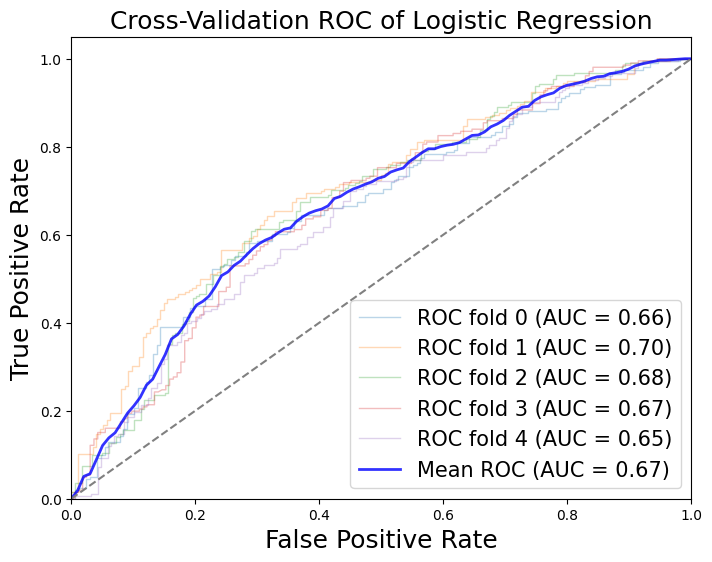

<Figure size 640x480 with 0 Axes>

In [111]:
##Logistic regression with physicochemical_properties
from sklearn.linear_model import LogisticRegression
# Initialize Logistic Regression model
lr_model = LogisticRegression(random_state=42)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
plt.figure(figsize=(8, 6))
i = 0

all_true_labels = []
all_predictions = []

# Loop over each split
for i in range(5):
     # Load train and test sets
    train_filepath = os.path.join(DATAPATH, f"train_test_splits/train_physicochemical_properties{i}.csv")
    test_filepath = os.path.join(DATAPATH, f"train_test_splits/test_physicochemical_properties{i}.csv")
    
    train = pd.read_csv(train_filepath)
    test = pd.read_csv(test_filepath)
    
    X_train, y_train = train.drop(columns=['toxicity']), train['toxicity']
    X_test, y_test = test.drop(columns=['toxicity']), test['toxicity']

    # Train Logistic Regression model
    lr_model.fit(X_train, y_train)

    # Predict probabilities
    y_pred_proba = lr_model.predict_proba(X_test)[:, 1]

    # Compute ROC curve and area under the curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0

    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    # Classification report
    y_pred = (y_pred_proba > 0.5).astype(int)
    print(f"\nClassification Report for Fold {i}:\n")
    print(classification_report(y_test, y_pred))

    # Accumulate true labels and predictions
    all_true_labels.extend(y_test)
    all_predictions.extend(y_pred)

    i += 1

# Calculate and print the average classification report
print("\nAverage Classification Report Across All Folds:\n")
print(classification_report(all_true_labels, all_predictions))

# Calculate mean ROC curve and AUC
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = np.mean(aucs)

# Plot mean ROC curve with boundaries
plt.plot(mean_fpr, mean_tpr, color='b', label=r'Mean ROC (AUC = %0.2f)' % mean_auc, lw=2, alpha=.8)

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Cross-Validation ROC of Logistic Regression', fontsize=18)
plt.legend(loc="lower right", prop={'size': 15})
plt.show()


Classification Report for Fold 0:

              precision    recall  f1-score   support

           0       0.61      0.75      0.67       167
           1       0.75      0.61      0.67       203

    accuracy                           0.67       370
   macro avg       0.68      0.68      0.67       370
weighted avg       0.69      0.67      0.67       370


Classification Report for Fold 1:

              precision    recall  f1-score   support

           0       0.73      0.18      0.29       174
           1       0.56      0.94      0.70       196

    accuracy                           0.58       370
   macro avg       0.65      0.56      0.50       370
weighted avg       0.64      0.58      0.51       370


Classification Report for Fold 2:

              precision    recall  f1-score   support

           0       0.67      0.62      0.65       179
           1       0.67      0.72      0.69       191

    accuracy                           0.67       370
   macro avg       0

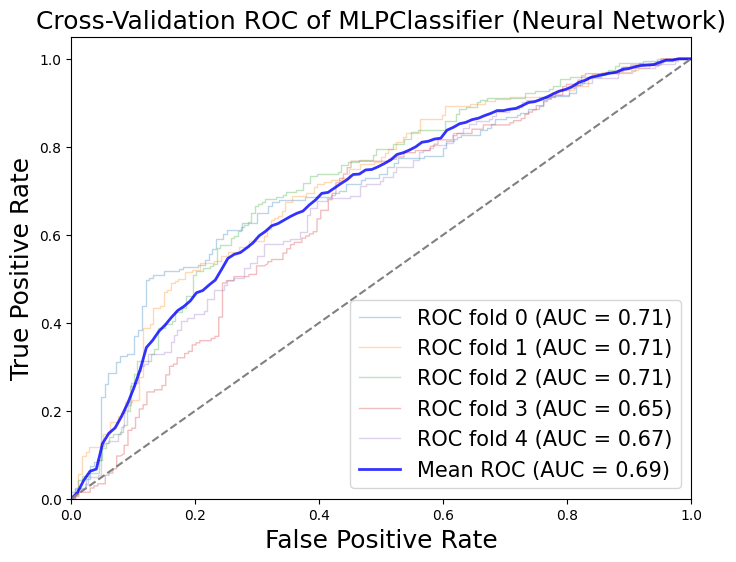

<Figure size 640x480 with 0 Axes>

In [112]:
##Neural network with physicochemical_properties
from sklearn.neural_network import MLPClassifier



# Initialize Neural Network model
nn_model = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', random_state=42)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
plt.figure(figsize=(8, 6))
i = 0

all_true_labels = []
all_predictions = []

# Loop over each split
for i in range(5):
     # Load train and test sets
    train_filepath = os.path.join(DATAPATH, f"train_test_splits/train_physicochemical_properties{i}.csv")
    test_filepath = os.path.join(DATAPATH, f"train_test_splits/test_physicochemical_properties{i}.csv")
    
    train = pd.read_csv(train_filepath)
    test = pd.read_csv(test_filepath)
    
    X_train, y_train = train.drop(columns=['toxicity']), train['toxicity']
    X_test, y_test = test.drop(columns=['toxicity']), test['toxicity']

    # Train Neural Network model
    nn_model.fit(X_train, y_train)

    # Predict probabilities
    y_pred_proba = nn_model.predict_proba(X_test)[:, 1]

    # Compute ROC curve and area under the curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0

    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    # Classification report
    y_pred = (y_pred_proba > 0.5).astype(int)
    print(f"\nClassification Report for Fold {i}:\n")
    print(classification_report(y_test, y_pred))

    # Accumulate true labels and predictions
    all_true_labels.extend(y_test)
    all_predictions.extend(y_pred)

    i += 1

# Calculate and print the average classification report
print("\nAverage Classification Report Across All Folds:\n")
print(classification_report(all_true_labels, all_predictions))

# Calculate mean ROC curve and AUC
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = np.mean(aucs)

# Plot mean ROC curve with boundaries
plt.plot(mean_fpr, mean_tpr, color='b', label=r'Mean ROC (AUC = %0.2f)' % mean_auc, lw=2, alpha=.8)

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Cross-Validation ROC of MLPClassifier (Neural Network)', fontsize=18)
plt.legend(loc="lower right", prop={'size': 15})
plt.show()
